# explore dataset
now we explore how the questions are set to work

Imports and Setup: The script begins by importing necessary libraries such as os, json, pandas, and matplotlib.pyplot. It then sets the path to the JSON file containing your data.
Data Loading: The JSON data is loaded into a Python dictionary using the json.load() function.
Data Processing: A loop iterates over each entry in the 'questions' list of your JSON data. It collects the 'type' of each question and appends it to a list called question_types.
Data Analysis: The list of question types is converted into a pandas DataFrame for easier handling. The value_counts() method is used on the DataFrame to compute the frequency of each type of question.
Visualization: Using matplotlib, a bar plot is created to visually represent the frequency of each question type. Adjustments are made for aesthetics, such as setting the figure size, adding labels and titles, and rotating the x-axis labels for better readability.



Processing data: 100%|██████████| 4064/4064 [00:00<00:00, 416550.22it/s]


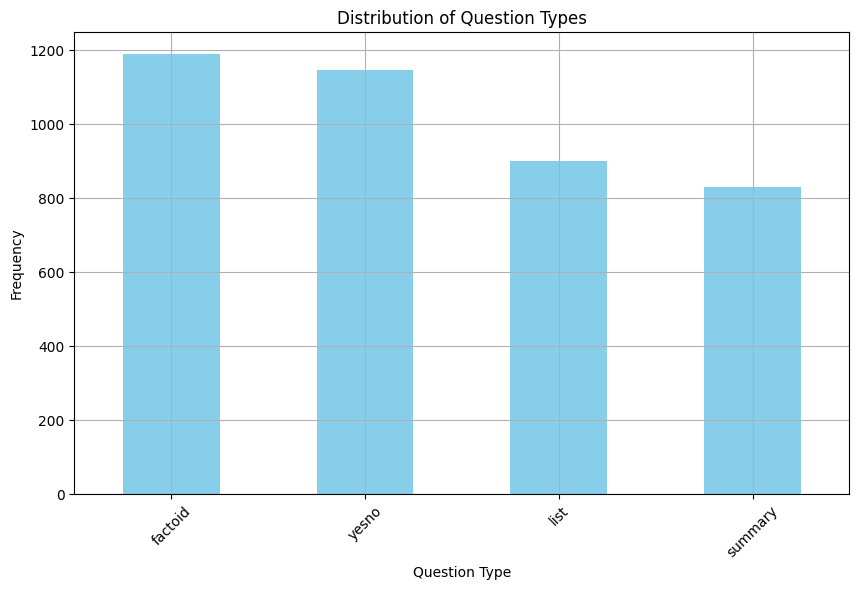

Type
factoid    1190
yesno      1145
list        900
summary     829
Name: count, dtype: int64

In [22]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Specify the path to the JSON file
output_json_path = os.path.expanduser('~/Questions_answers_data/all_questions_in_system.json')

# Load the data from the JSON file
with open(output_json_path, 'r') as file:
    data = json.load(file)

# Initialize an empty list to collect the question types
question_types = []

# Iterate over each entry in the JSON data
for entry in tqdm(data['questions'], desc='Processing data'):
    question_types.append(entry['type'])  # Append the type of each question to the list

# Convert the list to a DataFrame for easier manipulation
df = pd.DataFrame(question_types, columns=['Type'])

# Count the frequency of each question type
type_counts = df['Type'].value_counts()

# Create a bar plot to visualize the counts of each question type
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Question Types')
plt.xlabel('Question Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
type_counts

In [23]:
import pandas as pd

# Assuming 'data' is already loaded and contains the JSON data with the key 'questions'
# We will create a DataFrame from the loaded data
df = pd.DataFrame(data['questions'])

# Group the data by the 'type' and get the first five entries for each type
grouped_samples = df.groupby('type').head(5)

# Print the first five examples for each question type
print("First 5 examples per question type:")
print(grouped_samples)


First 5 examples per question type:
                                              triples  \
0                                                  []   
1                                                  []   
2                                                  []   
3                                                  []   
4   [{'p': 'http://www4.wiwiss.fu-berlin.de/diseas...   
5                                                 NaN   
6                                                  []   
7                                                  []   
8                                                 NaN   
9                                                 NaN   
10                                                 []   
11                                                 []   
13                                                 []   
14                                                 []   
16                                                 []   
18                                                 [

we use this function ot approximate the beahvour excpected by the Rag system

In [24]:
import random
def dummy_request(query, querytype):
    # Generate a dummy list of PubMed IDs
    pubIDs = [random.randint(100000, 999999) for _ in range(5)]  # Randomly generate 5 PubMed IDs
    somemore = [random.randint(100000, 999999) for _ in range(5)]  # Randomly generate 5 PubMed IDs
    # Use a match-case to handle different types of queries
    match querytype:
        case 'yesno':
            result = random.choice(['Yes', 'No'])
        case 'summary':
            result = "Yes, ahdhs is deadly"
        case 'factoid':
            result = "Cancer"
        case 'list':
            result = ['Anemia', 'Bronchitis', 'Cholecystitis', 'Dermatitis']
        case _:
            result = "Unsupported query type"
    
    # Return a tuple of the result and the list of PubMed IDs
    return result, pubIDs, somemore

In [25]:
genaue standards definiert auf ipad zeichnung am 24 april

SyntaxError: invalid syntax (1687565919.py, line 1)

{
    "questionid": "54e25eaaae9738404b000017", // Unique identifier for the question
    "question": "Is the protein Papilin secreted?", // The text of the question posed
    "trueresponse": "Yes, papilin is a secreted protein", // The correct answer from the dataset
    "ragresponse": "Yes", // The answer provided by the RAG system
    "querytype": "yesno", // Type of the question (e.g., yesno, factoid, list, summary)
    "answered_correct": "true", // Whether the RAG system's response was correct (true, false, partly)
    "percentage_correct_answers": 100, // Percentage of correct answers provided by the RAG system (hypothetical)
    "returned_correct_pubmedid": true, // Indicates if the correct PubMed IDs were returned
    "numb_of_pubmedid_returned": 8, // Number of PubMed IDs returned by the RAG system
    "pubmedids": [
        "21784067",
        "20805556",
        "19724244",
        "19297413",
        "15094122",
        "15094110",
        "12666201",
        "11076767",
        "7515725",
        "3320045"
    ] // List of PubMed IDs referenced by the RAG system
}


THis is the standardized response each test will return, non sucessfull runs will not return anything

In [ ]:
{
    "questionid": "54e25eaaae9738404b000017", // Unique identifier for the question
    "question": "Is the protein Papilin secreted?", // The text of the question posed
    "trueresponse": "Yes, papilin is a secreted protein", // The correct answer from the dataset
    "ragresponse": "Yes", // The answer provided by the RAG system
    "querytype": "yesno", // Type of the question (e.g., yesno, factoid, list, summary)
    "answered_correct": "true", // Whether the RAG system's response was correct (true, false, partly)
    "percentage_correct_answers": 100, // Percentage of correct answers provided by the RAG system (hypothetical)
    "returned_correct_pubmedid": true, // Indicates if the correct PubMed IDs were returned
    "numb_of_pubmedid_returned": 8, // Number of PubMed IDs returned by the RAG system
    "requestime": 0.2, // time it took  for the entire request
    "pubmedids": [
        "21784067",
        "20805556",
        "19724244",
        "19297413",
        "15094122",
        "15094110",
        "12666201",
        "11076767",
        "7515725",
        "3320045"
    ] // List of PubMed IDs referenced by the RAG system
}

#this is a not working example what each eval should return

SyntaxError: unterminated string literal (detected at line 7) (2578088295.py, line 7)

# RAG System Evaluation

This Jupyter Notebook is designed to evaluate the performance of a Retrieval-Augmented Generation (RAG) system. The evaluation process involves processing a set of predefined questions stored in a JSON file. These questions are answered by the RAG system, and the responses are analyzed for accuracy in both the answers provided and the relevance of the documents retrieved.

## Overview

- The `RAG_evaluator` class is responsible for managing the entire evaluation process.
- It initializes with paths to the input JSON file containing the questions and the output path for the results.
- The `run_eval` method orchestrates the reading of the question file, processing each question, and writing the results.
- Different types of questions (yes/no, factoid, list) are handled specifically with methods tailored to evaluate the correctness of each question type based on the RAG's response.
- The system's effectiveness in retrieving relevant documents is assessed by comparing the PubMed IDs retrieved by the RAG with those listed in the reference documents.

The results from this evaluation will help in understanding the strengths and weaknesses of the RAG system in various aspects of question answering and information retrieval.


In [ ]:

import time
from tqdm import tqdm
import re
import json
import sys
# Navigate up from 'dataset_filter' to 'evaluation', then 'information_retrieval', and up to the root
# Then access the 'rag_system' directory
sys.path.append('../../../../rag_system/')

# Import the module
from RAG import RAG


class RAG_evaluator():
    """
    This class is designed to evaluate the performance of a Retrieval-Augmented Generation (RAG) system by processing a set of questions provided in a JSON file. It supports handling different types of questions, evaluates the accuracy of the RAG's responses, and measures the system's effectiveness in retrieving relevant documents.

    Attributes:
        path_to_jsonfile (str): Path to the JSON file containing the questions for evaluation.
        output_path (str): Path where the output results will be written in JSON format.
    """
    def __init__(self,path_to_question_json,output_path):
        # Initialization can be used to set up necessary variables or states
        self.path_to_jsonfile = path_to_question_json
        self.output_path = output_path
        """
        Initializes the RAG_evaluator with the specified paths for the question JSON file and the output file.

        Parameters:
            path_to_question_json (str): Path to the JSON file containing the questions for evaluation.
            output_path (str): Path where the output results will be written in JSON format.
        """

    def run_eval(self):
        """
        Executes the evaluation of the RAG system by reading the question JSON file, processing each question, and writing the results to the output JSON file. The process includes timing the evaluation and displaying progress.
        """
        start_time = time.time()  # Start timing

        # Read the input JSON file
        with open(self.path_to_jsonfile, 'r') as file:
            data = json.load(file)

        results = []
        #here we implement a variable to limit the amount of request sent for testing purposes
        iter = 0
        # Process each question and display progress
        for question in tqdm(data['questions'], desc="Processing questions"):
            #response = self.request_selector(question['id'], question['type'])
            response = self.request_selector(question)
            if response is not None:
                results.append(response)
                iter = iter +1
                if iter%10 == 0: #keep track how many iterations where done
                        print(iter)
                if iter > 20:
                   
                    break

        # Write the results to the output JSON file
        with open(self.output_path, 'w') as file:
            json.dump(results, file, indent=4)

        end_time = time.time()  # End timing
        elapsed_time = end_time - start_time
        print(f"Results written to {self.output_path}")
        print(f"Processing time: {elapsed_time:.2f} seconds")
        
    
  



    def request_selector(self,question):
        """
        Selects the appropriate RAG model based on the question type and processes the question to get the RAG's response. It also evaluates the correctness of the response and the effectiveness of the document retrieval.

        Parameters:
            question (dict): A dictionary representing a question with keys for ID, body, type, and the exact answer.

        Returns:
            dict: A dictionary containing detailed evaluation results for the question.
        """

        
        
        # be aware that in the current implementation only yesno and list questions are answered
        # we transfered tje logic into the match case  to reduce api requests
        match question["type"]:
            case 'yesno':
             
                # Method to evaluate  based on the query type
                rag = RAG(retriever=1, question_type=2)
                       #time request
                start_time = time.time()
                rag_answer  = rag.get_answer(question["body"]) #dummy_request(question["body"],question["type"])
                  # Stop timing              
                end_time = time.time()

                #typecast string into json object
                rag_answer = json.loads(rag_answer)
                try:
                    # Extracting the necessary information if the keys are present
                    response = rag_answer.get("response")
                    k_pubmedids = rag_answer["retrieved_PMIDs"]
                    used_pubmedids = rag_answer["used_PMIDs"]                
                    # Calculate elapsed time in seconds
                    elapsed_time = end_time - start_time
                    correct_pubmed, num_correct_pubmed, matched_ids= self.compare_pubmed_ids(used_pubmedids, question["documents"])
                    correct_pubmed_retrieved, num_correct_pubmed_retrieved, matched_ids_retrieved= self.compare_pubmed_ids(k_pubmedids, question["documents"])
                except Exception as e: 
                     print(question["body"])
                     print("caused the following error:")
                     print(e)
                     return None    
                    
                answered_correct,percentage_correct_answers = self.yesno_eval(response,question["exact_answer"])
            case 'summary':
                return None
                #currently we dont evaluate summary responses
                answered_correct,percentage_correct_answers = self.summary_eval(question["exact_answer"])
            case 'factoid':
                #currently we dont evaluate factoid responses

                return None
                answered_correct,percentage_correct_answers = self.factoid_eval(question["exact_answer"])
            case 'list':
                #currently we dont evaluate summary responses

                return None
                start_time = time.time()
                # Method to evaluate  based on the query type
                response, k_pubmedids, used_pubmedids = dummy_request(question["body"],question["type"])
                # Stop timing
                end_time = time.time()
                # Calculate elapsed time in seconds
                elapsed_time = end_time - start_time
                correct_pubmed, num_correct_pubmed, matched_ids= self.compare_pubmed_ids(used_pubmedids, question["documents"])
                correct_pubmed_retrieved, num_correct_pubmed_retrieved, matched_ids_retrieved= self.compare_pubmed_ids(k_pubmedids, question["documents"])

                answered_correct,percentage_correct_answers = self.list_eval(response,question["exact_answer"])
            case _:
                return None
   
                
            
            
            
        return {
            "questionid": question["id"],
            "querytype": question["type"],
            "question": question["body"],
            "trueresponse_exact": question["exact_answer"],
            "ragresponse": response,
            "answered_correct": answered_correct,
            "percentage_correct_answers": percentage_correct_answers,
            "returned_correct_pubmedid": correct_pubmed,
            "numb_of_pubmedid_returned": num_correct_pubmed,
            "returned_pubmedids": matched_ids,
            "retrieved_correct_pubmed": correct_pubmed_retrieved     ,
            "num_of_pubmedid_retrieved":num_correct_pubmed_retrieved ,
            "retrieved_pubmedids":  matched_ids_retrieved  ,
             "requestime":elapsed_time
        }
 


    def factoid_eval(self,rag_response, true_response):
        """
        Evaluates the RAG's response for factoid questions against the true response.

        Parameters:
            rag_response (str): The RAG's response to the question.
            true_response (str): The correct answer to the question.

        Returns:
            tuple: A tuple containing a boolean indicating if the response was correct and the percentage of correctness.
        """

        # Placeholder for factoid evaluation logic
        return answered_correct, percentage_correct_answers

    def summary_eval(self,queryID):
        """
        Evaluates the RAG's response for summary questions.

        Parameters:
            queryID (str): The ID of the question being evaluated.

        Returns:
            tuple: A tuple with placeholder values, currently not implemented.
        """
        # Placeholder for summary evaluation logic
        return "lol","lol"

    def yesno_eval(self, rag_response, true_response):
        """
        Evaluates the RAG's response for yes/no questions against the true response.

        Parameters:
            rag_response (str): The RAG's response to the question.
            true_response (str): The correct answer to the question.

        Returns:
            tuple: A tuple containing a boolean indicating if the response was correct and the percentage of correctness.
        """
        # Define valid responses
        valid_responses = {"yes", "no"}
        
        # Check if both responses are valid
        if rag_response.lower() not in valid_responses or true_response.lower() not in valid_responses:
            return -5, -5
        
        # Calculate if the answers are correct (1 if true, 0 if false)
        answered_correct = True if rag_response.lower() == true_response.lower() else False
        
        # Since it's a single comparison, correct percentage is 100% or 0%
        percentage_correct_answers = 100 if answered_correct else 0
        
        return answered_correct, percentage_correct_answers

    def flatten_list(self,nested_list):
        """
        Flattens a nested list into a single list of elements.

        Parameters:
            nested_list (list): The list to flatten.

        Returns:
            list: A flattened list containing all elements from the nested list.
        """

        flat_list = []
        for item in nested_list:
            if isinstance(item, list):
                flat_list.extend(flatten_list(item))  # Recursively flatten the list
            else:
                flat_list.append(item)
        return flat_list

    def list_eval(self,rag_response, true_responses):
        """
        Evaluates the RAG's response for list-type questions against the true responses.

        Parameters:
            rag_response (str): The RAG's response to the question.
            true_responses (list): The correct answers to the question.

        Returns:
            tuple: A tuple containing a boolean indicating if the response was correct and the percentage of correctness.
        """
        # Assuming rag_response is a string of items separated by commas
        rag_list = [item.strip() for item in str(rag_response).split(',')]

        # Flatten the true_responses if it is a list of lists
        true_list = self.flatten_list(true_responses)

        # Convert lists into sets for comparison
        rag_set = set(rag_list)
        true_set = set(true_list)

        # Check if the provided answer is exactly correct
            #might do a more adavnaced version of this at a later stage but in my opinion llm will largely provide grammatically correct responses so should
    #be fine without normalization
        answered_correct = rag_set == true_set

        # Calculate the percentage of correct answers
        correct_items = rag_set.intersection(true_set)
        if true_list:
            percentage_correct_answers = (len(correct_items) / len(true_set)) * 100
        else:
            percentage_correct_answers = 0.0  # To handle cases where there are no true responses

        return answered_correct, percentage_correct_answers

  
    def compare_pubmed_ids(self, pubmed_ids, documents):
        """
        Compares PubMed IDs returned by the RAG system with those listed in the documents to evaluate the accuracy of document retrieval.

        Parameters:
            pubmed_ids (list): A list of PubMed IDs retrieved by the RAG system.
            documents (list): A list of document URLs containing the correct PubMed IDs.

        Returns:
            tuple: A tuple containing a boolean indicating if any correct PubMed ID was retrieved, the number of correct PubMed IDs, and a list of matched PubMed IDs.
        """
        # Ensure pubmed_ids is a list, if not, set it to an empty list
        if not isinstance(pubmed_ids, list):
            pubmed_ids = []

        # Extract PubMed IDs from the document URLs
        extracted_ids = [re.search(r'pubmed/(\d+)', doc).group(1) for doc in documents if re.search(r'pubmed/(\d+)', doc)]
        #print(extracted_ids)
        # Compare the extracted IDs with the provided list of PubMed IDs
        matched_ids = [pid for pid in extracted_ids if pid in pubmed_ids]
        #print(matched_ids)

        # Determine if any correct PubMed ID was found
        correct_pubmed = len(matched_ids) > 0
        num_correct_pubmed = len(matched_ids)

        return correct_pubmed, num_correct_pubmed, matched_ids
    
    




In [ ]:
#here we test the above provided class

eval = RAG_evaluator("/home/ubuntu/Questions_answers_data/all_questions_in_system.json","/home/ubuntu/Questions_answers_data/result.json")
eval.run_eval()

Processing questions:   0%|          | 12/4064 [01:59<11:11:55,  9.95s/it] 


KeyboardInterrupt: 

here we have some tests of the above functions to validate their accuary
this will remain undocumenterd as its only for experiments


In [26]:
import re
def compare_pubmed_ids(pubmed_ids, documents):
        # Extract PubMed IDs from the document URLs
        extracted_ids = [re.search(r'pubmed/(\d+)', doc).group(1) for doc in documents if re.search(r'pubmed/(\d+)', doc)]
        
        # Compare the extracted IDs with the provided list of PubMed IDs
        matched_ids = [pid for pid in extracted_ids if pid in pubmed_ids]
        
        # Determine if any correct PubMed ID was found
        correct_pubmed = len(matched_ids) > 0
        
        # Number of correct PubMed IDs found
        num_correct_pubmed = len(matched_ids)
        
        return correct_pubmed, num_correct_pubmed, matched_ids


# Example usage:
pubmed_ids_list = ['23392090', '22986150', '99999999']  # Example list of PubMed IDs
documents_list = [
    "http://www.ncbi.nlm.nih.gov/pubmed/23392090",
    "http://www.ncbi.nlm.nih.gov/pubmed/22986150",
    "http://www.ncbi.nlm.nih.gov/pubmed/21459689",
    # Other URLs...
]

correct_pubmed, num_correct_pubmed, true_pubmed_ids = compare_pubmed_ids(pubmed_ids_list, documents_list)
print("Correct PubMed Found:", correct_pubmed)
print("Number of Correct PubMed IDs:", num_correct_pubmed)
print("True PubMed IDs:", true_pubmed_ids)

Correct PubMed Found: True
Number of Correct PubMed IDs: 2
True PubMed IDs: ['23392090', '22986150']


In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
from torch.nn.functional import cosine_similarity

class BioBERTFactoidEvaluator:
    def __init__(self):
        self.tokenizer = AutoTokenizer.from_pretrained("dmis-lab/biobert-v1.1")
        self.model = AutoModel.from_pretrained("dmis-lab/biobert-v1.1")

    def get_embedding(self, text):
        # Encode the text using tokenizer
        encoded_input = self.tokenizer(text, return_tensors='pt', truncation=True, max_length=512)
        # Get the output from BioBERT
        with torch.no_grad():
            output = self.model(**encoded_input)
        # Use mean pooling to get a single vector embedding from the last hidden state
        embeddings = output.last_hidden_state.mean(dim=1)
        return embeddings

    def factoid_eval(self, rag_response, true_responses):
        rag_embedding = self.get_embedding(rag_response)
        true_embeddings = [self.get_embedding(ans) for ans in true_responses]

        # Compute cosine similarity and find the highest score
        max_similarity = max(cosine_similarity(rag_embedding, true_embed)[0] for true_embed in true_embeddings)

        threshold = 0.7  # Define a similarity threshold
        answered_correct = max_similarity >= threshold
        percentage_correct_answers = max_similarity.item() * 100  # Convert to percentage

        return answered_correct, percentage_correct_answers

# Example usage:
rag_response = "There is no relationship between altered thyroid profile and mortality in patients with heart failure"
true_responses = ["There is a relationship between altered thyroid profile and mortality in patients with heart failure"]
evaluator = BioBERTFactoidEvaluator()
correct, percent_correct = evaluator.factoid_eval(rag_response, true_responses)
print("Correct:", correct)
print("Percentage Correct:", percent_correct)


Correct: tensor(True)
Percentage Correct: 98.82432818412781


In [ ]:
def list_eval(rag_response, true_responses):
    # Split the response string into a list of words or phrases
    # Assuming the response is a comma-separated string of items
    rag_list = [item.strip() for item in rag_response.split(',')]
    
    # Convert the true_responses, which might also be in a string format, into a list
    true_list = [item.strip() for item in true_responses.split(',')]

    # Convert lists into sets for comparison
    rag_set = set(rag_list)
    true_set = set(true_list)

    # Check if the provided answer is exactly correct
    answered_correct = rag_set == true_set
    #might do a more adavnaced version of this at a later stage but in my opinion llm will largely provide grammatically correct responses so should
    #be fine without normalization
    # Calculate the percentage of correct answers
    correct_items = rag_set.intersection(true_set)
    if true_list:
        percentage_correct_answers = (len(correct_items) / len(true_set)) * 100
    else:
        percentage_correct_answers = 0.0  # To handle cases where there are no true responses

    return answered_correct, percentage_correct_answers

# Example usage
rag_response = "nose, ear, meniscus"
true_responses = "nose, ear, meniscus"
print(list_eval(rag_response, true_responses))


(True, 100.0)


In [ ]:
def flatten_list(nested_list):
    """Flatten a nested list into a flat list of elements."""
    flat_list = []
    for item in nested_list:
        if isinstance(item, list):
            flat_list.extend(flatten_list(item))  # Recursively flatten the list
        else:
            flat_list.append(item)
    return flat_list

def list_eval(rag_response, true_responses):
    # Assuming rag_response is a string of items separated by commas
    rag_list = [item.strip() for item in rag_response.split(',')]

    # Flatten the true_responses if it is a list of lists
    true_list = flatten_list(true_responses)

    # Convert lists into sets for comparison
    rag_set = set(rag_list)
    true_set = set(true_list)

    # Check if the provided answer is exactly correct
    answered_correct = rag_set == true_set

    # Calculate the percentage of correct answers
    correct_items = rag_set.intersection(true_set)
    if true_list:
        percentage_correct_answers = (len(correct_items) / len(true_set)) * 100
    else:
        percentage_correct_answers = 0.0  # To handle cases where there are no true responses

    return answered_correct, percentage_correct_answers

# Example usage
rag_response = "hydrocephalus, cerebral calcification, chorioretinitis"
true_responses = [
    ["hydrocephalus"],
    ["cerebral calcification"],
    ["chorioretinitis"]
]
print(list_eval(rag_response, true_responses))

# Another example with multiple strings in inner lists
rag_response = "Insulin Dependent Diabetes Mellitus, Grave's disease, Breast Cancer, Dementia"
true_responses = [
    ["Insulin Dependent Diabetes Mellitus", "type I (insulin-dependent) diabetes mellitus (IDDM)"],
    ["Grave's disease"],
    ["Breast Cancer"],
    ["Dementia"]
]
print(list_eval(rag_response, true_responses))


(True, 100.0)
(False, 80.0)
